In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import log,dot,exp,shape
import math

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#an excel sheet of columns to the problem statement was was made

#url = 'https://drive.google.com/file/d/1-w_xkRxWyJaDyjjdIbmSKqTEacivmyNi/view?usp=sharing'

#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#print(path)
columns = pd.read_csv("/content/drive/MyDrive/DM_COL_LIST_FINAL.csv")

In [ ]:
#the relevant columns are being read into a series and then being converted into a list of strings
cols = columns["col_no"]
cols = columns["col_no"].values.astype("str")
cols

array(['V024', 'V025', 'V026', 'V044', 'V106', 'V012', 'V107', 'V113',
       'V115', 'V116', 'V166', 'V190', 'V191', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V219', 'V220', 'V221', 'V225',
       'V226', 'V227', 'V228', 'V233', 'V234', 'V235', 'V237', 'V238',
       'V239', 'V240', 'V241', 'V242', 'V243', 'V312', 'V313', 'V315',
       'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323',
       'V359', 'V360', 'V361', 'V362', 'V363', 'V364', 'V367', 'V372',
       'V375A', 'V376', 'V384A', 'V384B', 'V384C', 'V384D', 'V393',
       'V394', 'V395', 'V3A01', 'V3A02', 'V3A03', 'V3A04', 'V3A05',
       'V3A06', 'V3A08A', 'V3A08B', 'V3A08C', 'V3A08D', 'V401', 'V437',
       'V438', 'V445', 'V447A', 'V453', 'V454', 'V457', 'V463A', 'V463B',
       'V463C', 'V463D', 'V463E', 'V463F', 'V463G', 'V463H', 'V463I',
       'V463J', 'V463K', 'V463L', 'V463X', 'V463AA', 'V463AB', 'V464',
       'V

In [ ]:
#dataset is being read to create a dataframe with the sekected relevant columns
'''url2 = 'https://drive.google.com/file/d/1O8L0kra0_PUIx_gKKIL4N9Qeu980uio3/view?usp=sharing'
proxy =  url2.split("/",5)
#proxy[5]
path2 = 'https://drive.google.com/uc?export=download&id=' + proxy[5]
print(path2)
#IABR = pd.read_csv(path2,usecols = cols)
#IABR'''

'url2 = \'https://drive.google.com/file/d/1O8L0kra0_PUIx_gKKIL4N9Qeu980uio3/view?usp=sharing\'\nproxy =  url2.split("/",5)\n#proxy[5]\npath2 = \'https://drive.google.com/uc?export=download&id=\' + proxy[5]\nprint(path2)\n#IABR = pd.read_csv(path2,usecols = cols)\n#IABR'

In [ ]:
!unzip drive/MyDrive/Datasets/IABR.zip

Archive:  drive/MyDrive/Datasets/IABR.zip
  inflating: IABR2005-06.csv         
  inflating: IABR2005-06.MAP         
  inflating: IABR2015-16.csv         
  inflating: IABR2015-16.MAP         
  inflating: IABR2019-21.csv         
  inflating: IABR2019-21.MAP         


# **DATA CLEANING**

---



In [ ]:
IABR = pd.read_csv("/content/IABR2019-21.csv",usecols = cols)
IABR

<ipython-input-6-8a06e6baae6f>:1: DtypeWarning: Columns (52,55,92,127,152,153,170,173,182,183,184,307,308,316,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127) have mixed types. Specify dtype option on import or set low_memory=False.
  IABR = pd.read_csv("/content/IABR2019-21.csv",usecols = cols)


,V012,V024,V025,V026,V044,V106,V107,V113,V115,V116,...,S321K,S321L,S321M,S321N,S321X,S321Y,S728A,S728B,S728D,S728DB
0,38,1,2,,3,1,5,14,996,44,...,0,0,0,1,0,0,0,0,1,1
1,38,1,2,,3,1,5,14,996,44,...,0,0,0,1,0,0,0,0,1,1
2,40,1,2,,0,0,,14,996,12,...,0,0,0,0,0,0,0,0,0,
3,40,1,2,,0,0,,14,996,12,...,0,0,0,0,0,0,0,0,0,
4,40,1,2,,0,0,,14,996,12,...,0,0,0,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274245,49,37,1,,0,2,7,61,996,12,...,0,0,0,0,0,0,0,0,0,
1274246,49,37,1,,0,2,7,61,996,12,...,0,0,0,0,0,0,0,0,0,
1274247,47,37,1,,0,0,,61,10,12,...,0,0,0,0,0,0,0,0,0,
1274248,47,37,1,,0,0,,61,10,12,...,0,0,0,0,0,0,0,0,0,


In [ ]:
#all the rows where the target row was missing are being dropped
IABR = IABR[IABR["S234"]!=" "]
IABR

,V012,V024,V025,V026,V044,V106,V107,V113,V115,V116,...,S321K,S321L,S321M,S321N,S321X,S321Y,S728A,S728B,S728D,S728DB
107,35,1,2,,3,1,5,14,996,12,...,0,0,0,0,0,0,0,1,0,
177,38,1,2,,3,2,4,14,120,31,...,0,0,1,1,0,0,0,0,0,
178,38,1,2,,3,2,4,14,120,31,...,0,0,1,1,0,0,0,0,0,
240,30,1,2,,0,3,6,31,996,12,...,0,0,0,0,0,0,0,0,0,
269,32,1,2,,3,0,,31,996,12,...,0,0,0,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,,3,2,4,61,996,12,...,0,0,0,0,0,0,0,0,0,
1274116,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,0,0,0,
1274117,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,0,0,0,
1274118,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,0,0,0,


In [ ]:
IABR["S234"].unique()

array(['1', '3', '2'], dtype=object)

In [ ]:
proxy = pd.get_dummies(IABR['S234'],drop_first=False)

In [ ]:
proxy.rename(columns = { '1':'Miscarraige','2':'Abortion','3':'Stillbirth'}, inplace = True)
proxy

,Miscarraige,Abortion,Stillbirth
107,1,0,0
177,1,0,0
178,1,0,0
240,0,0,1
269,0,1,0
...,...,...,...
1274084,0,0,1
1274116,1,0,0
1274117,1,0,0
1274118,1,0,0


In [ ]:
IABR = pd.concat([IABR,proxy],axis=1)
IABR

,V012,V024,V025,V026,V044,V106,V107,V113,V115,V116,...,S321N,S321X,S321Y,S728A,S728B,S728D,S728DB,Miscarraige,Abortion,Stillbirth
107,35,1,2,,3,1,5,14,996,12,...,0,0,0,0,1,0,,1,0,0
177,38,1,2,,3,2,4,14,120,31,...,1,0,0,0,0,0,,1,0,0
178,38,1,2,,3,2,4,14,120,31,...,1,0,0,0,0,0,,1,0,0
240,30,1,2,,0,3,6,31,996,12,...,0,0,0,0,0,0,,0,0,1
269,32,1,2,,3,0,,31,996,12,...,0,0,0,0,0,0,,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,,3,2,4,61,996,12,...,0,0,0,0,0,0,,0,0,1
1274116,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,,1,0,0
1274117,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,,1,0,0
1274118,38,37,1,,3,2,7,61,10,12,...,0,0,0,0,0,0,,1,0,0


In [ ]:
for col in IABR.columns :
  print(col)

In [ ]:
#blank spaces are being replace with a null value
df = IABR.replace(' ', np.NaN)
df

,V012,V024,V025,V026,V044,V106,V107,V113,V115,V116,...,S321N,S321X,S321Y,S728A,S728B,S728D,S728DB,Miscarraige,Abortion,Stillbirth
107,35,1,2,NaN,3,1,5,14,996,12,...,0,0,0,0,1,0,NaN,1,0,0
177,38,1,2,NaN,3,2,4,14,120,31,...,1,0,0,0,0,0,NaN,1,0,0
178,38,1,2,NaN,3,2,4,14,120,31,...,1,0,0,0,0,0,NaN,1,0,0
240,30,1,2,NaN,0,3,6,31,996,12,...,0,0,0,0,0,0,NaN,0,0,1
269,32,1,2,NaN,3,0,NaN,31,996,12,...,0,0,0,0,0,0,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,NaN,3,2,4,61,996,12,...,0,0,0,0,0,0,NaN,0,0,1
1274116,38,37,1,NaN,3,2,7,61,10,12,...,0,0,0,0,0,0,NaN,1,0,0
1274117,38,37,1,NaN,3,2,7,61,10,12,...,0,0,0,0,0,0,NaN,1,0,0
1274118,38,37,1,NaN,3,2,7,61,10,12,...,0,0,0,0,0,0,NaN,1,0,0


<Axes: >

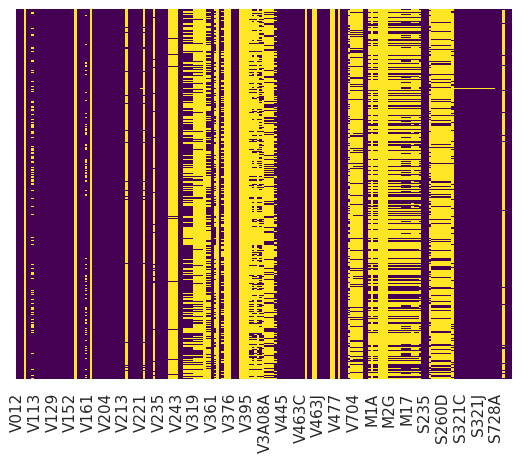

In [ ]:
#a heatmap has been created using seaborne library to check how many null values aare there
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#setting a threahold value of 0.2, which states that atleast 0.2 percent of rows of the column should not be NaN
test = df
#test = test.dropna(thresh = 0.2*52030, how='all', axis = 1)
test = test.dropna(thresh = 0.2*52030,axis = 1)

#target variable has been dropped
#test = test.drop(['S234'], axis=1)



In [ ]:
#all the ramianig na values are filled with the mode of their espective column
for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

<Axes: >

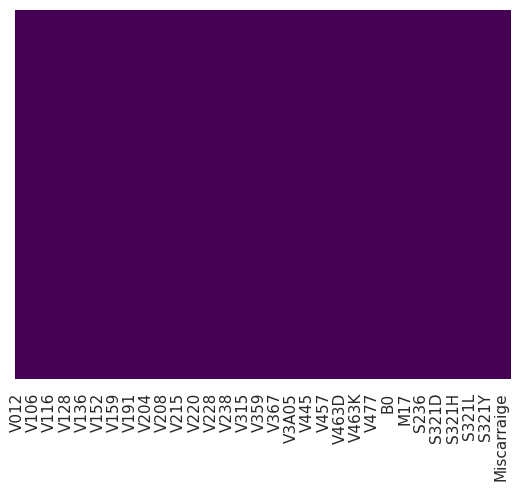

In [ ]:
#another heatmap generated after cleaning the data
import seaborn as sns
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#a test cell to check what all columns have survived the initial cleaning
for col in test.columns :
  print(col)

In [ ]:
test

,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S321M,S321N,S321X,S321Y,S728A,S728B,S728D,Miscarraige,Abortion,Stillbirth
107,35,1,2,3,1,5,14,996,12,1,...,0,0,0,0,0,1,0,1,0,0
177,38,1,2,3,2,4,14,120,31,1,...,1,1,0,0,0,0,0,1,0,0
178,38,1,2,3,2,4,14,120,31,1,...,1,1,0,0,0,0,0,1,0,0
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,0,0,0,0,0,1
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,0,0,0,0,0,1
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,0,1,0,0
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,0,1,0,0
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#CORELATION
'''import phik
phimatrix = test.phik_matrix()
def correlation(dataset, threshold):
   col_corr = set()
   corr_matrix = phimatrix

   for i in range(len(corr_matrix.columns)):
     for j in range(i):
       if (corr_matrix.iloc[i,j])>threshold:
         colname = corr_matrix.columns[i]
         col_corr.add(colname)
   return col_corr
corr_features = correlation(test, 0.96)

test = test.drop(['V313'], axis=1,inplace=True)'''

"import phik\nphimatrix = test.phik_matrix()\ndef correlation(dataset, threshold):\n   col_corr = set()\n   corr_matrix = phimatrix\n  \n   for i in range(len(corr_matrix.columns)):\n     for j in range(i):\n       if (corr_matrix.iloc[i,j])>threshold:\n         colname = corr_matrix.columns[i]\n         col_corr.add(colname)\n   return col_corr\ncorr_features = correlation(test, 0.96)\n\ntest = test.drop(['V313'], axis=1,inplace=True)"

In [ ]:
'''plt.figure(figsize = (15,10))
ax=sns.heatmap(phimatrix)'''

'plt.figure(figsize = (15,10))\nax=sns.heatmap(phimatrix)'

# **NORMALIZATION**

---



In [ ]:
#NORMALIZATION
#The column list below is a list of columns with continuous data
normalise_column = ['V191','V152','V437','V438','V445','V453']
for i in normalise_column:
  test[i]=test[i].astype(float)
  #print(test.dtypes[i])
  test[i] = (test[i] - test[i].min()) /(test[i].max()-test[i].min()) #Z - score normalization



# **FEATURE** **ENGINEERING**

---



## SMOKING

In [ ]:
#FEATURE ENGINEERING 1:
#AGGREGATION AND FEATURE CONSTRUCTION
#SMOKING
#The given list of column refers to wether or not a person indulges in different things like gutka,tobacco,ciggerette,beedi etc
#A new feature smokes has been created by aggregating all the above columns
col_list = ['V463A','V463B','V463C','V463D','V463F','V463G','V463J','V463K','V463L','V463X']
def smoking_details(col):
  smokes = [];
  for i in col:
    if i==1:
      return 1
      print("smokes")
    else:
      return 0
      print("not smokes")

  return smokes


smokes = test[['V463A','V463B','V463C','V463D','V463F','V463G','V463J','V463K','V463L','V463X']].apply(smoking_details,axis=1)
#test.drop(['V463A','V463B','V463C','V463D','V463F','V463G','V463J','V463K','V463L','V463X'],axis=1,inplace=True)
test["Smokes"] = smokes
test



<ipython-input-18-2de321b0ad00>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Smokes"] = smokes


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S321N,S321X,S321Y,S728A,S728B,S728D,Miscarraige,Abortion,Stillbirth,Smokes
107,35,1,2,3,1,5,14,996,12,1,...,0,0,0,0,1,0,1,0,0,0
177,38,1,2,3,2,4,14,120,31,1,...,1,0,0,0,0,0,1,0,0,0
178,38,1,2,3,2,4,14,120,31,1,...,1,0,0,0,0,0,1,0,0,0
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,0,0,0,0,1,0
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,0,0,0,0,1,0
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,1,0,0,0
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,1,0,0,0
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,0,1,0,0,0


## PRENATAL CARE

In [ ]:
#FEATURE ENGINEERING 2:
#AGGREGATION AND FEATURE CONSTRUCTION
#PRENATAL CARE
col_list = ['M2A','M2B','M2G','M2H','M2I','M2J','M2K']
test[col_list] = test[col_list].apply(pd.to_numeric)
def prenatal_details(col):
  prenatal_care = [];
  for i in col:
    if i==1:
      return 1
      print("smokes")
    else:
      return 0
      print("not smokes")

  #return prenatal_care


prenatal_care = test[['M2A','M2B','M2G','M2H','M2I','M2J','M2K']].apply(prenatal_details,axis=1)
#test.drop(col_list,axis=1,inplace=True)
test["Prenatal_Care"] = prenatal_care
test

<ipython-input-19-294021d7be0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col_list] = test[col_list].apply(pd.to_numeric)
<ipython-input-19-294021d7be0b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Prenatal_Care"] = prenatal_care


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S321X,S321Y,S728A,S728B,S728D,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care
107,35,1,2,3,1,5,14,996,12,1,...,0,0,0,1,0,1,0,0,0,1
177,38,1,2,3,2,4,14,120,31,1,...,0,0,0,0,0,1,0,0,0,1
178,38,1,2,3,2,4,14,120,31,1,...,0,0,0,0,0,1,0,0,0,1
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,0,0,0,1,0,1
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,0,0,0,1,0,1
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,1,0,0,0,1
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,1,0,0,0,1
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,0,1,0,0,0,1


## CONTRACEPTION USE

In [ ]:
#FEATURE ENGINEERING 3:
#AGGREGATION AND FEATURE CONSTRUCTION
#CONTRACEPTION USE
col_list = ['S321A','S321B','S321C','S321D','S321E','S321F','S321G','S321H','S321I','S321J','S321K','S321L','S321M','S321N','S321X','S321Y']
test[col_list] = test[col_list].apply(pd.to_numeric)
def contraception_details(col):
  contraception = [];
  for i in col:
    if i==1:
      return 1
      print("smokes")
    else:
      return 0
      print("not smokes")

  return prenatal_care


contraception = test[col_list].apply(contraception_details,axis=1)
#test.drop(col_list,axis=1,inplace=True)
test["Contraception_Use"] = contraception
test

<ipython-input-20-10447c18e7be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col_list] = test[col_list].apply(pd.to_numeric)
<ipython-input-20-10447c18e7be>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Contraception_Use"] = contraception


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S321Y,S728A,S728B,S728D,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use
107,35,1,2,3,1,5,14,996,12,1,...,0,0,1,0,1,0,0,0,1,0
177,38,1,2,3,2,4,14,120,31,1,...,0,0,0,0,1,0,0,0,1,0
178,38,1,2,3,2,4,14,120,31,1,...,0,0,0,0,1,0,0,0,1,0
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,0,0,1,0,1,0
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,0,0,1,0,1,0
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,1,0,0,0,1,0
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,1,0,0,0,1,0
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,0,1,0,0,0,1,0


## EDUCATION

In [ ]:
test["V106"].unique()


array([1, 2, 3, 0])

In [ ]:
test["V106"]
def education_level(df, column_name):
    education = []
    for value in df[column_name]:
        if value in [0, 1]:
            education.append("uneducated")
        elif value in [2, 3]:
            education.append("educated")
        else:
            education.append(None)

    return education

test['Education'] = education_level(test, 'V106')

test


<ipython-input-22-e062c7efd812>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Education'] = education_level(test, 'V106')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S728A,S728B,S728D,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education
107,35,1,2,3,1,5,14,996,12,1,...,0,1,0,1,0,0,0,1,0,uneducated
177,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,0,0,1,0,educated
178,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,0,0,1,0,educated
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,0,1,0,1,0,educated
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,0,1,0,0,1,0,uneducated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,0,1,0,1,0,educated
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,0,0,1,0,educated
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,0,0,1,0,educated
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,0,0,1,0,educated


OCCUPATION

In [ ]:
#test["V717"].unique()

In [ ]:
'''test["V717"]
def Occupation(df, column_name):
    Occupation = []
    for value in df[column_name]:
        if value in [1,3,4]:
            Occupation.append("not hard labour")
        elif value in [2, 3]:
            Occupation.append("educated")
        else:
            Occupation.append(None)

    return Occupation

test['Occupation'] = Occupation(test, 'V717')

test'''


## PLACE OF DELIVERY

In [ ]:
#test["M15"].dtypes
test["M15"] = test["M15"].apply(pd.to_numeric)
test["M15"].dtypes


<ipython-input-23-a22c9a4a133f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["M15"] = test["M15"].apply(pd.to_numeric)


dtype('int64')

In [ ]:
def delivery_place(df, column_name):
    delivery_place = []
    for value in df[column_name]:
        if value < 15:
            delivery_place.append("home delivery")
        elif (value>15)&(value<30):
            delivery_place.append("Public Hospital")
        elif (value>29)&(value<35):
            delivery_place.append("Private Hospital")
        else:
            delivery_place.append("Other")

    return delivery_place

test['Delivery_Place'] = delivery_place(test, 'M15')

test


<ipython-input-24-94ccd1f514c0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Delivery_Place'] = delivery_place(test, 'M15')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S728B,S728D,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place
107,35,1,2,3,1,5,14,996,12,1,...,1,0,1,0,0,0,1,0,uneducated,Public Hospital
177,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,0,0,1,0,educated,Public Hospital
178,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,0,0,1,0,educated,Public Hospital
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,0,1,0,1,0,educated,Private Hospital
269,32,1,2,3,0,5,31,996,12,1,...,0,0,0,1,0,0,1,0,uneducated,Public Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,0,1,0,1,0,educated,Public Hospital
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,0,0,1,0,educated,Public Hospital
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,0,0,1,0,educated,Public Hospital
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,0,0,1,0,educated,Public Hospital


## WEALTH(UPPER/MIDDLE/LOWER)

In [ ]:
test["V190"].unique()
test["V190"].dtypes


dtype('int64')

In [ ]:
def wealth(df, column_name):
    wealth = []
    for value in df[column_name]:
        if value in [1, 2]:
            wealth.append("Lower class")
        elif value == 3 :
            wealth.append("Middle Class")
        elif value in [4, 5]:
            wealth.append("Upper class")
        else:
            wealth.append(None)

    return wealth

test['Wealth'] = wealth(test, 'V190')

test

<ipython-input-26-69ae0bf8bb98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Wealth'] = wealth(test, 'V190')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,S728D,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth
107,35,1,2,3,1,5,14,996,12,1,...,0,1,0,0,0,1,0,uneducated,Public Hospital,Lower class
177,38,1,2,3,2,4,14,120,31,1,...,0,1,0,0,0,1,0,educated,Public Hospital,Lower class
178,38,1,2,3,2,4,14,120,31,1,...,0,1,0,0,0,1,0,educated,Public Hospital,Lower class
240,30,1,2,0,3,6,31,996,12,1,...,0,0,0,1,0,1,0,educated,Private Hospital,Upper class
269,32,1,2,3,0,5,31,996,12,1,...,0,0,1,0,0,1,0,uneducated,Public Hospital,Middle Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,0,1,0,1,0,educated,Public Hospital,Lower class
1274116,38,37,1,3,2,7,61,10,12,1,...,0,1,0,0,0,1,0,educated,Public Hospital,Upper class
1274117,38,37,1,3,2,7,61,10,12,1,...,0,1,0,0,0,1,0,educated,Public Hospital,Upper class
1274118,38,37,1,3,2,7,61,10,12,1,...,0,1,0,0,0,1,0,educated,Public Hospital,Upper class


## TOILET FACILITIES

In [ ]:
test["V116"] = test["V116"].apply(pd.to_numeric)
test["V116"].dtypes

<ipython-input-27-cb6a5d13940f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["V116"] = test["V116"].apply(pd.to_numeric)


dtype('int64')

In [ ]:
def toilet_facilities(df, column_name):
    toilet_facilities = []
    for value in df[column_name]:
        if value in [10,11,12,13,14,15]:
            toilet_facilities.append("Toilet with flush")
        elif value in [30,31]:
            toilet_facilities.append("No toilet")
        elif value in [21,22,23]:
            toilet_facilities.append("Pit latrines")
        elif value == 41:
            toilet_facilities.append("Composting toilet")
        elif value == 42:
            toilet_facilities.append("Bucket toilet")
        elif value == 43:
            toilet_facilities.append("Hanging toilet")
        else:
            toilet_facilities.append("Other")

    return toilet_facilities

test['Toilet_Facilities'] = toilet_facilities(test, 'V116')

test

<ipython-input-28-1697611d0752>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Toilet_Facilities'] = toilet_facilities(test, 'V116')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,Miscarraige,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth,Toilet_Facilities
107,35,1,2,3,1,5,14,996,12,1,...,1,0,0,0,1,0,uneducated,Public Hospital,Lower class,Toilet with flush
177,38,1,2,3,2,4,14,120,31,1,...,1,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet
178,38,1,2,3,2,4,14,120,31,1,...,1,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet
240,30,1,2,0,3,6,31,996,12,1,...,0,0,1,0,1,0,educated,Private Hospital,Upper class,Toilet with flush
269,32,1,2,3,0,5,31,996,12,1,...,0,1,0,0,1,0,uneducated,Public Hospital,Middle Class,Toilet with flush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,0,1,0,1,0,educated,Public Hospital,Lower class,Toilet with flush
1274116,38,37,1,3,2,7,61,10,12,1,...,1,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush
1274117,38,37,1,3,2,7,61,10,12,1,...,1,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush
1274118,38,37,1,3,2,7,61,10,12,1,...,1,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush


## ANEMIA

In [ ]:
test['HW57'].unique()
test["HW57"] = test["HW57"].apply(pd.to_numeric)


<ipython-input-29-5d22492e5f81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["HW57"] = test["HW57"].apply(pd.to_numeric)


In [ ]:
def anemia(df, column_name):
    anemia = []
    for value in df[column_name]:
        if value in [1,2]:
            anemia.append(1)
        elif value in [3,4,9]:
            anemia.append(0)
        else:
            anemia.append("Other")

    return anemia

test['anemia'] = anemia(test, 'HW57')

test

<ipython-input-30-5e76b7370785>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['anemia'] = anemia(test, 'HW57')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth,Toilet_Facilities,anemia
107,35,1,2,3,1,5,14,996,12,1,...,0,0,0,1,0,uneducated,Public Hospital,Lower class,Toilet with flush,1
177,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1
178,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1
240,30,1,2,0,3,6,31,996,12,1,...,0,1,0,1,0,educated,Private Hospital,Upper class,Toilet with flush,1
269,32,1,2,3,0,5,31,996,12,1,...,1,0,0,1,0,uneducated,Public Hospital,Middle Class,Toilet with flush,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,1,0,1,0,educated,Public Hospital,Lower class,Toilet with flush,1
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1


In [ ]:
test

,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,Abortion,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth,Toilet_Facilities,anemia
107,35,1,2,3,1,5,14,996,12,1,...,0,0,0,1,0,uneducated,Public Hospital,Lower class,Toilet with flush,1
177,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1
178,38,1,2,3,2,4,14,120,31,1,...,0,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1
240,30,1,2,0,3,6,31,996,12,1,...,0,1,0,1,0,educated,Private Hospital,Upper class,Toilet with flush,1
269,32,1,2,3,0,5,31,996,12,1,...,1,0,0,1,0,uneducated,Public Hospital,Middle Class,Toilet with flush,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,0,1,0,1,0,educated,Public Hospital,Lower class,Toilet with flush,1
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1


# REGION

In [ ]:
#test["V025"].dtypes()
test["V025"] = test["V025"].apply(pd.to_numeric)


<ipython-input-32-69c883d9f1d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["V025"] = test["V025"].apply(pd.to_numeric)


In [ ]:
def region(df, column_name):
    region = []
    for value in df[column_name]:
        if value == 1:
            region.append("Urban")
        elif value == 2 :
            region.append("Rural")
        else:
            region.append(None)

    return region

test['Region'] = region(test, 'V025')

test

<ipython-input-33-18c661eb32a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Region'] = region(test, 'V025')


,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth,Toilet_Facilities,anemia,Region
107,35,1,2,3,1,5,14,996,12,1,...,0,0,1,0,uneducated,Public Hospital,Lower class,Toilet with flush,1,Rural
177,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1,Rural
178,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1,Rural
240,30,1,2,0,3,6,31,996,12,1,...,1,0,1,0,educated,Private Hospital,Upper class,Toilet with flush,1,Rural
269,32,1,2,3,0,5,31,996,12,1,...,0,0,1,0,uneducated,Public Hospital,Middle Class,Toilet with flush,1,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,1,0,1,0,educated,Public Hospital,Lower class,Toilet with flush,1,Urban
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban


## BINARISED DIABETES,THYROID,HYPERTENSION

In [ ]:
col_list = ['S728A','S728B','S728D']
test[col_list] = test[col_list].apply(pd.to_numeric)
def fix_notknown(df,col):
  df[col] = df[col].replace(8,0)
  return df

for i in col_list:
  test = fix_notknown(test,i)
#test.drop(col_list,axis=1,inplace=True)
#test["Contraception_Use"] = contraception
#test[col_list] = test[col_list].apply(pd.replace(8,0))
test[col_list]


<ipython-input-34-c6d77a18dfda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col_list] = test[col_list].apply(pd.to_numeric)
<ipython-input-34-c6d77a18dfda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(8,0)


,S728A,S728B,S728D
107,0,1,0
177,0,0,0
178,0,0,0
240,0,0,0
269,0,0,0
...,...,...,...
1274084,0,0,0
1274116,0,0,0
1274117,0,0,0
1274118,0,0,0


In [ ]:
test

,V012,V024,V025,V044,V106,V107,V113,V115,V116,V119,...,Stillbirth,Smokes,Prenatal_Care,Contraception_Use,Education,Delivery_Place,Wealth,Toilet_Facilities,anemia,Region
107,35,1,2,3,1,5,14,996,12,1,...,0,0,1,0,uneducated,Public Hospital,Lower class,Toilet with flush,1,Rural
177,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1,Rural
178,38,1,2,3,2,4,14,120,31,1,...,0,0,1,0,educated,Public Hospital,Lower class,No toilet,1,Rural
240,30,1,2,0,3,6,31,996,12,1,...,1,0,1,0,educated,Private Hospital,Upper class,Toilet with flush,1,Rural
269,32,1,2,3,0,5,31,996,12,1,...,0,0,1,0,uneducated,Public Hospital,Middle Class,Toilet with flush,1,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,31,37,1,3,2,4,61,996,12,1,...,1,0,1,0,educated,Public Hospital,Lower class,Toilet with flush,1,Urban
1274116,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban
1274117,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban
1274118,38,37,1,3,2,7,61,10,12,1,...,0,0,1,0,educated,Public Hospital,Upper class,Toilet with flush,1,Urban


# **CREATING FINAL DATAFRAME**

---



RENAMIN COLUMNS

In [ ]:
test.rename(columns={"S728A": "Diabetes", "S728B": "Hypertension","S728D":"Thyroid","V438":"Height",
                     "V437":"Weight","V445":"BMI","V024":"State",
                     "V228":"Terminated_pregnancy","V208":"Births_last_five_years"},inplace=True)


<ipython-input-36-11eab187c341>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={"S728A": "Diabetes", "S728B": "Hypertension","S728D":"Thyroid","V438":"Height",


PICKING FINAL COLUMNS

In [ ]:
col_list = ["State","Region","Height","Weight","BMI","Terminated_pregnancy","Births_last_five_years",
            "Smokes","Prenatal_Care","Education","Contraception_Use","Delivery_Place",
            "Wealth","Toilet_Facilities","anemia","Diabetes","Hypertension","Thyroid","Miscarraige"]
final_test = test[col_list]
final_test

,State,Region,Height,Weight,BMI,Terminated_pregnancy,Births_last_five_years,Smokes,Prenatal_Care,Education,Contraception_Use,Delivery_Place,Wealth,Toilet_Facilities,anemia,Diabetes,Hypertension,Thyroid,Miscarraige
107,1,Rural,0.066704,0.065522,0.216025,1,0,0,1,uneducated,0,Public Hospital,Lower class,Toilet with flush,1,0,1,0,1
177,1,Rural,0.065481,0.043681,0.124289,1,0,0,1,educated,0,Public Hospital,Lower class,No toilet,1,0,0,0,1
178,1,Rural,0.065481,0.043681,0.124289,1,0,0,1,educated,0,Public Hospital,Lower class,No toilet,1,0,0,0,1
240,1,Rural,0.057699,0.054856,0.202936,1,1,0,1,educated,0,Private Hospital,Upper class,Toilet with flush,1,0,0,0,0
269,1,Rural,0.062368,0.040634,0.119850,1,1,0,1,uneducated,0,Public Hospital,Middle Class,Toilet with flush,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,37,Urban,0.054919,0.038094,0.130776,1,0,0,1,educated,0,Public Hospital,Lower class,Toilet with flush,1,0,0,0,0
1274116,37,Urban,0.055475,0.047237,0.174368,1,1,0,1,educated,0,Public Hospital,Upper class,Toilet with flush,1,0,0,0,1
1274117,37,Urban,0.055475,0.047237,0.174368,1,1,0,1,educated,0,Public Hospital,Upper class,Toilet with flush,1,0,0,0,1
1274118,37,Urban,0.055475,0.047237,0.174368,1,1,0,1,educated,0,Public Hospital,Upper class,Toilet with flush,1,0,0,0,1


ONE HOT ENCODING

In [ ]:
col_list = ["Education","Delivery_Place","Wealth","Toilet_Facilities","Region","Births_last_five_years"]
prox_df=pd.DataFrame()
for i in col_list:
  proxy = pd.get_dummies(final_test[i],drop_first=False)
  prox_df  = pd.concat([prox_df,proxy],axis=1)
prox_df

,educated,uneducated,Other,Private Hospital,Public Hospital,home delivery,Lower class,Middle Class,Upper class,Composting toilet,...,Pit latrines,Toilet with flush,Rural,Urban,0,1,2,3,4,5
107,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
177,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
178,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
240,1,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
269,0,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274084,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1274116,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1274117,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1274118,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [ ]:
final_test = pd.concat([final_test,prox_df],axis=1)
proxy = final_test.drop(["Education","Delivery_Place","Wealth","Toilet_Facilities","Region","Births_last_five_years"],axis=1)
proxy

,State,Height,Weight,BMI,Terminated_pregnancy,Smokes,Prenatal_Care,Contraception_Use,anemia,Diabetes,...,Pit latrines,Toilet with flush,Rural,Urban,0,1,2,3,4,5
236204,8.0,0.059477,0.041548,0.132939,1.0,0.0,1.0,1.0,1.0,0.0,...,0,1,1,0,1,0,0,0,0,0
420963,10.0,0.054586,0.030171,0.092078,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0
649824,18.0,0.057921,0.034945,0.106192,1.0,0.0,1.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,0
933093,23.0,0.055364,0.033929,0.108354,1.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,1,0,1,0,0,0,0
776181,20.0,0.084269,0.033320,0.039039,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,1,0,0,0,0,0
1274084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,1,0,0,0,0,0
1274116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,0,0,0
1274117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,0,0,0


In [ ]:
print(proxy.columns)


In [ ]:
final_test = proxy
final_test

In [ ]:
final_test.info()

# **VISUALIZATION**

---



In [ ]:
#count plot for checking the number of misccaraiges,stillbirths and abortions
#1-miscarraige,2-abortion,3-stillbirth

sns.set_theme(style="whitegrid")
sns.countplot(x=final_test["Miscarraige"])
plt.title("Miscarraige")
plt.figure(figsize = (15,10))



In [ ]:
'''sns.set_theme(style="whitegrid")
sns.countplot(data = test,x="Prenatal_Care",hue = "Stillbirth" )
plt.title("Type of residency and Pregnancy Termination Type")
plt.figure(figsize = (15,10))'''




In [ ]:
#count plot for checking the number of misccaraiges,stillbirths and abortions depending on the region(rural/urban)
#1-urban,2-rural
#1-miscarraige,2-abortion,3-stillbirth
'''sns.set_theme(style="whitegrid")
sns.countplot(data = test,x="V025",hue = "S234" )
plt.title("Type of residency and Pregnancy Termination Type")'''


In [ ]:
#count plot for checking the number of misccaraiges,stillbirths and abortions depending on the state
#1-miscarraige,2-abortion,3-stillbirth
'''sns.set_theme(style="whitegrid")
#plt.figure(figsize = (20,10))

sns.countplot(data = test,x="V024",hue = "S234" )
plt.title("State and Pregnancy Termination Type")'''



In [ ]:
#count plot for checking the number of misccaraiges,stillbirths and abortions depending on the type of cooking fuel
#1-miscarraige,2-abortion,3-stillbirth
'''sns.set_theme(style="whitegrid")
#plt.figure(figsize = (20,10))

sns.countplot(data = test,x="V161",hue = "Miscarraige" )
plt.title("Cooking fuel and Pregnancy Termination Type")'''

# **SAMPLING**

---



In [ ]:
#SAMPLING
#a simple random sample has been generated
def sampling(df):
  sample_test = df.sample(frac = 0.5,replace = False)
  return sample_test

#sample_test = sampling(final_test)
#sample_test

# **DATA** **ANALYSIS**

---



# LOGISTIC REGRESSION









In [ ]:
thresh = 0.5
rate = 0.00001


In [ ]:
class LogisticRegression:

  def initialize(self,X_train):
    weights = np.zeros((X_train.shape[1]+1,1))
    X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
    #print(X_train.shape,weights.shape)
    return weights,X_train

  def sigmoid(self,z):
    sig = 1/(1+exp(-z))
    #print(1+exp(-z))
    return sig

    '''
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)'''

  def fit_normal(self,X,y,alpha=0.00001,iter=10000):
    weights,X = self.initialize(X)

    def cost(weights):
      z = dot(X,weights)
      cost0 = dot(y.T,log(self.sigmoid(z)))
          #k = self.sigmoid(z)
      cost1 = dot((1-y).T,log((exp(-z)*self.sigmoid(z))))
      cost = -((cost1 + cost0))/len(y)
      return cost

    cost_list = np.zeros(iter)
    iterations = np.zeros(iter)
    for i in range(iter):
        weights = weights - alpha*dot(X.T,(self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1))))
        cost_list[i] = cost(weights)
        iterations[i] = i
    self.weights = weights
    return cost_list,iterations,weights

  def predict(self,X,thresh):
    z = dot(self.initialize(X)[1],self.weights)
    outcome = []
    for i in self.sigmoid(z):
      if i>thresh:
        outcome.append(1)
      else:
        outcome.append(0)
    return outcome


In [ ]:
'''
class LogisticRegression:

  def __init__(self, alpha=0.001, max_iter=10000, threshold=0.5):
    self.alpha = alpha
    self.max_iter = max_iter
    self.threshold = threshold

  def initialize(self,X_train):
    weights = np.zeros((X_train.shape[1]+1,1))
    X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
    return weights,X_train

  def sigmoid(self,z):
    """
    Numerically stable sigmoid function.
    """
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)'
    sig = 1/(1+exp(-z))
    #print(1+exp(-z))
    return sig'''

'''
  def fit(self,X,y):
    weights,X = self.initialize(X)

    # calculate the proportion of each class
    p = np.mean(y)

    # calculate the weights for each class
    w0 = 1 / (1 - p)
    w1 = 1 / p

    # create a new column for the weights
    weights_col = np.array([w1 if i == 1 else w0 for i in y])
    X = np.multiply(X, np.tile(weights_col, (X.shape[1], 1)).T)

    def cost(weights):
      z = np.dot(X,weights)
      cost0 = np.dot(y.T,np.log(self.sigmoid(z)))
      cost1 = np.dot((1-y).T,np.log((np.exp(-z)*self.sigmoid(z))))
      cost = -((cost1 + cost0))/len(y)
      return cost

    X_t = X.transpose()
    cost_list = np.zeros(self.max_iter)
    iterations = np.zeros(self.max_iter)
    for i in range(self.max_iter):
        sto = np.random.randint(377)
        X_sto = X[sto,:]
        Y_sto = y[sto]

        X_sto_t = X_t[:,sto]
        z = np.dot(X,weights)
        y_hat = self.sigmoid(z)

        errors = y_hat - y
        gradient = np.zeros(X.shape[1] + 1)
        gradient[0] = np.sum(weights[0] * errors) / len(y)
        gradient[1:] = np.dot(weights[1:] * errors, X) / len(y)
        weights = weights - self.alpha * gradient
        cost_list[i] = cost(weights)
        iterations[i] = i
    self.weights = weights
    return cost_list, iterations, weights

  def predict(self,X):
    X = np.c_[np.ones((X.shape[0],1)),X]
    z = np.dot(X,self.weights)
    outcome = np.where(self.sigmoid(z) > self.threshold, 1, 0)
    return outcome'''


In [ ]:
'''class LogisticRegression:

  def __init__(self, alpha=0.001, max_iter=10000, threshold=0.5):
    self.alpha = alpha
    self.max_iter = max_iter
    self.threshold = threshold

  def initialize(self,X_train):
    print("shape of X in initialise is :",X_train.shape)
    weights = np.zeros((X_train.shape[1]+1,1))
    X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
    return weights,X_train

  def sigmoid(self,z):
    """
    Numerically stable sigmoid function.
    """
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)
    sig = 1/(1+exp(-z))
    #print(1+exp(-z))
    return sig


  def fit(self,X,y):

    # calculate the proportion of each class
    p = np.mean(y)

    # calculate the weights for each class
    w0 = 1 / (1 - p)
    w1 = 1 / p

    # create a new column for the weights
    weights_col = np.array([w1 if i == 1 else w0 for i in y]).reshape(-1, 1)
    X = np.multiply(X, np.tile(weights_col, (1, X.shape[1])))
    print(X.shape)
    weights,X = self.initialize(X)
    #row_to_be_added = np.array([0])
    #result = np.r_[weights,row_to_be_added]

    weights = np.append(weights, np.array([[0]]), axis=0)


    print(weights.shape)


    def cost(weights):
      z = np.dot(X,weights)
      cost0 = np.dot(y.T,np.log(self.sigmoid(z)))
      cost1 = np.dot((1-y).T,np.log((np.exp(-z)*self.sigmoid(z))))
      cost = -((cost1 + cost0))/len(y)
      return cost
    print(X.shape)
    #X_t = X.transpose()
    cost_list = np.zeros(self.max_iter)
    iterations = np.zeros(self.max_iter)
    for i in range(self.max_iter):
        sto = np.random.randint(377)
        X_sto = X[sto,:].reshape(1, -1)
        Y_sto = y[sto].reshape(1, -1)

        #X_sto_t = X_t[:, sto]

        print(weights.shape)
        print(X_sto.shape)



        z = np.dot(X_sto, weights[1:]) + weights[0]
        y_hat = self.sigmoid(z)

        errors = np.reshape(y_hat - Y_sto, (1, -1))
        gradient = np.zeros(X.shape[1] + 1)
        gradient[0] = np.sum(errors) / len(Y_sto)
        gradient[1:] = np.dot(errors, X_sto.T) / len(Y_sto)
        weights[0] = weights[0] - self.alpha * gradient[0]
        weights[1:] = weights[1:] - self.alpha * gradient[1:]
        cost_list[i] = cost(weights)
        iterations[i] = i
    self.weights = weights
    return cost_list, iterations, weights

  def predict(self,X):
    X = np.c_[np.ones((X.shape[0],1)),X]
    z = np.dot(X,self.weights)
    outcome = np.where(self.sigmoid(z) > self.threshold, 1, 0)
    return outcome'''


In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
#def test_train_split(df):
final_test = sampling(final_test)
#print(final_test)
final_test_X = final_test.drop(['Miscarraige','State','Terminated_pregnancy','Smokes','Height','Weight','BMI'],axis=1)
final_test_X = final_test_X.reset_index(drop=True)

#final_test_X = final_test[['Height','Weight','BMI']]
final_test_Y = final_test['Miscarraige']

X = np.array(final_test_X)
Y = np.array(final_test_Y)

sf=0.8 #split factor

n_train = math.floor(sf * X.shape[0])
n_test = math.ceil((1-sf) * X.shape[0])
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

#return X_train,Y_train,X_test,Y_test


In [ ]:
final_test_X

In [ ]:
final_test_X.info()

In [ ]:
features = list(final_test_X.columns)
cost = []
iterations = []
weights = []



In [ ]:
X_train.shape

In [ ]:
LR = LogisticRegression()
cost,iterations,weights = LR.fit_normal(X_train,Y_train)
y_pred = LR.predict(X_test,thresh)
y_train = LR.predict(X_train,thresh)

train_accuracy = accuracy(Y_train,y_train)
test_accuracy = accuracy(Y_test,y_pred)

print("testing accuracy = ", test_accuracy, " training accuracy = ", train_accuracy)
print(y_pred)
print(weights)



testing accuracy =  0.6111858543148184  training accuracy =  0.6255525658274073
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
for i in Y_test:
  print(i)

Streaming output truncated to the last 5000 lines.
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
1
1
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
0
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
0
1
1
0

In [ ]:
for i in cost:
  print(i)

Streaming output truncated to the last 5000 lines.
0.6526622286771964
0.6526621974354173
0.6526621661980015
0.6526621349649487
0.6526621037362569
0.6526620725119245
0.6526620412919513
0.6526620100763366
0.652661978865078
0.6526619476581751
0.6526619164556268
0.6526618852574321
0.6526618540635896
0.6526618228740984
0.6526617916889575
0.6526617605081653
0.6526617293317213
0.6526616981596244
0.652661666991873
0.6526616358284663
0.6526616046694034
0.6526615735146826
0.6526615423643036
0.6526615112182645
0.6526614800765651
0.6526614489392036
0.6526614178061796
0.6526613866774913
0.6526613555531375
0.6526613244331176
0.6526612933174311
0.6526612622060757
0.6526612310990509
0.6526611999963553
0.6526611688979886
0.6526611378039487
0.6526611067142355
0.6526610756288476
0.6526610445477832
0.6526610134710421
0.652660982398623
0.6526609513305242
0.6526609202667456
0.6526608892072856
0.6526608581521431
0.6526608271013173
0.6526607960548072
0.6526607650126109
0.6526607339747286
0.6526607029411576
0.

<Figure size 1500x1000 with 0 Axes>

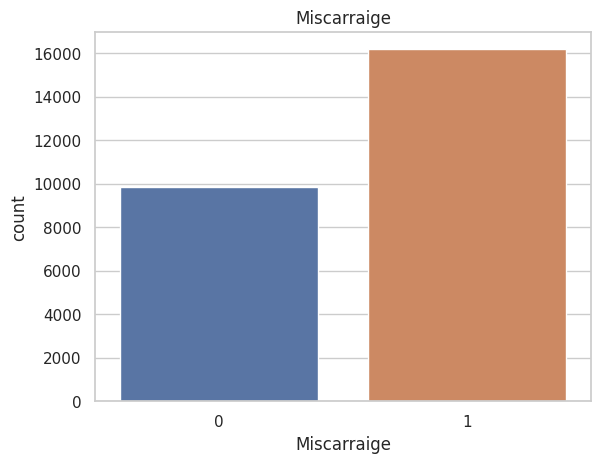

<Figure size 1500x1000 with 0 Axes>

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_test["Miscarraige"])
plt.title("Miscarraige")
plt.figure(figsize = (15,10))


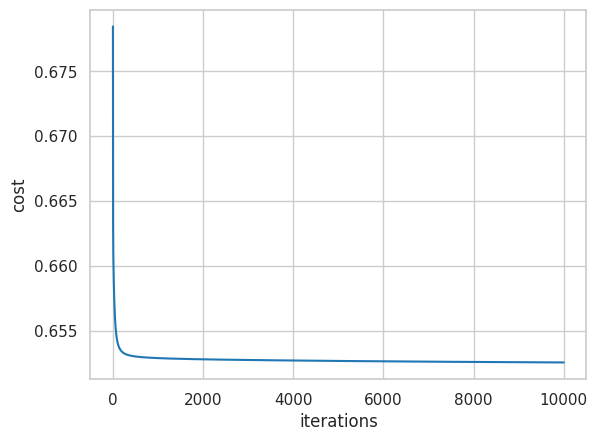

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.plot(iterations, cost, color ='tab:blue')
#lr = str(rate)
#thresh = str(thresh)
#name = descent + "_" + thresh + "_" + lr
#plt.title(name)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.figure(figsize = (15,10))
plt.show()



In [ ]:
final_test_X.columns

Index([    'Prenatal_Care', 'Contraception_Use',            'anemia',
                'Diabetes',      'Hypertension',           'Thyroid',
                'educated',        'uneducated',             'Other',
        'Private Hospital',   'Public Hospital',     'home delivery',
             'Lower class',      'Middle Class',       'Upper class',
       'Composting toilet',         'No toilet',             'Other',
            'Pit latrines', 'Toilet with flush',             'Rural',
                   'Urban',                   0,                   1,
                         2,                   3,                   4,
                         5],
      dtype='object')

In [ ]:
print(len(features))

28


In [ ]:
print(len(weights))

0


In [ ]:
factors = pd.DataFrame({"Features":features,"Weights":weights[1:]})
#factors = pd.concat([features,weights],axis=1)
factors
factors_sort = factors.sort_values(by = 'weights', ascending = False)

TypeError: ignored

In [ ]:
factors_sort

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)
cf_matrix

array([[ 137, 1884],
       [ 107, 3075]])